In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


### 함수 정의하기

In [11]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])
            dataset_X.append(features)
            
        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)

def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

### 1. 데이터 준비하기

In [12]:
# 코드 사전 정의
code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0

# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

### 2. 데이터 생성하기

In [13]:
x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨 값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is", one_hot_vec_size)

one hot encoding vector size is 12


### 3. 모델 구성하기

In [17]:
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 128)                  67072     
_________________________________________________________________
dense_1 (Dense)              (1, 12)                   1548      
Total params: 68,620
Trainable params: 68,620
Non-trainable params: 0
_________________________________________________________________


### 4. 모델 학습과정 설정하기

In [18]:
# 랜덤시드 고정시키기
np.random.seed(5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory()
history.init()

### 5. 모델 학습시키기

In [19]:
num_epochs = 2000

for epoch_idx in range(num_epochs):
    print('epochs: ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs: 0
Epoch 1/1
 - 1s - loss: 2.3387 - acc: 0.2600
epochs: 1
Epoch 1/1
 - 0s - loss: 2.0368 - acc: 0.3400
epochs: 2
Epoch 1/1
 - 0s - loss: 1.9656 - acc: 0.3400
epochs: 3
Epoch 1/1
 - 0s - loss: 1.9469 - acc: 0.3400
epochs: 4
Epoch 1/1
 - 0s - loss: 1.9359 - acc: 0.3400
epochs: 5
Epoch 1/1
 - 0s - loss: 1.9278 - acc: 0.3400
epochs: 6
Epoch 1/1
 - 0s - loss: 1.9213 - acc: 0.3400
epochs: 7
Epoch 1/1
 - 0s - loss: 1.9155 - acc: 0.3400
epochs: 8
Epoch 1/1
 - 0s - loss: 1.9099 - acc: 0.3400
epochs: 9
Epoch 1/1
 - 0s - loss: 1.9040 - acc: 0.3400
epochs: 10
Epoch 1/1
 - 0s - loss: 1.8984 - acc: 0.3400
epochs: 11
Epoch 1/1
 - 0s - loss: 1.8922 - acc: 0.3400
epochs: 12
Epoch 1/1
 - 0s - loss: 1.8816 - acc: 0.3600
epochs: 13
Epoch 1/1
 - 0s - loss: 1.8703 - acc: 0.3600
epochs: 14
Epoch 1/1
 - 0s - loss: 1.8603 - acc: 0.3600
epochs: 15
Epoch 1/1
 - 0s - loss: 1.8334 - acc: 0.3600
epochs: 16
Epoch 1/1
 - 0s - loss: 1.8185 - acc: 0.3800
epochs: 17
Epoch 1/1
 - 0s - loss: 1.7714 - acc: 0.3600
ep

### 6. 학습과정 살펴보기

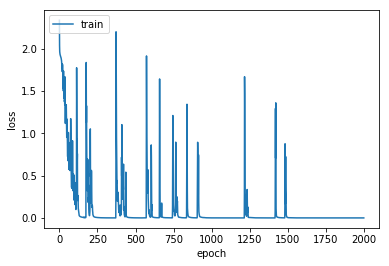

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [21]:
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 5ms/step
acc: 100.00%


### 8. 모델 사용하기

In [22]:
pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()

print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'd8', 'd8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [26]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_features = []

for si in seq_in:
    features = code2features(si)
    seq_in_features.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_features)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_features.append(features)
    seq_in_features.pop(0)

model.reset_states()

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
